# **AstrID:**  *predictions*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy.wcs import WCS
from tensorflow import keras
from keras.models import load_model
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from keras import backend as K

import os
import datetime
from astropy.io import fits
from astropy.table import Table
from astropy.wcs import WCS

# Import custom functions to extract our Image arrays and Pixel Mask arrays from our created fits files dataset
from dataGathering import extractImageArray, extractPixelMaskArray, extract_star_catalog
from dataGathering import getStarData, getCoordRangeFromPixels, getStarsInImage, getPixelCoordsFromStar, getImagePlot, getPixelMaskPlot
from dataGathering import displayRawImage, displayRawPixelMask, displayImagePlot, displayPixelMaskPlot, displayPixelMaskOverlayPlot

# Import custom function to preprocess Image and Pixel Mask arrays
from imageProcessing import normalizeImages, stackImages, stackMasks, preprocessImage

2024-11-21 22:45:20.480547: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-11-21 22:45:21.947329: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
# getStarData('II/246', 50, 'validate')

In [3]:
# Create images and masks arrays lists
images = []
masks = []

# Create a list of all the wcs data in the dataset folder
wcs_data = []

# Create a dataframe to store the star data inside each fits file
stars_table = []

# Create df to store the star data inside each fits file
stars_in_image = []

# Create a list of all the fits files in the dataset folder
fits_files = os.listdir('data/fits/')
fits_files = [file for file in fits_files if file.startswith('validate')]

# For all the fits files in the dataset folder specified in file_path, extract the image and mask arrays to the respective lists
file_path = 'data/fits/'
for file in os.listdir(file_path):
    if file.endswith('.png'):
        os.remove(file_path + file)
    if file.startswith('validate') and file.endswith('.fits'):
        images.append(extractImageArray(file_path + file))
        masks.append(extractPixelMaskArray(file_path + file))
        wcs = wcs_data.append(WCS(fits.open(file_path + file)[0].header))
        stars_table.append(extract_star_catalog(file_path + file))
        stars_in_image.append(getStarsInImage(wcs, extract_star_catalog(file_path + file).to_pandas(), getCoordRangeFromPixels(WCS(fits.open(file_path + file)[0].header))))

        print(file + ' added to dataset')

Number of stars in catalog query:  505
validate46.fits added to dataset
Number of stars in catalog query:  480
validate20.fits added to dataset
Number of stars in catalog query:  575
validate15.fits added to dataset
Number of stars in catalog query:  1938
validate8.fits added to dataset
Number of stars in catalog query:  2725
validate23.fits added to dataset
Number of stars in catalog query:  772
validate28.fits added to dataset
Number of stars in catalog query:  689
validate25.fits added to dataset
Number of stars in catalog query:  627
validate29.fits added to dataset
Number of stars in catalog query:  551
validate44.fits added to dataset
Number of stars in catalog query:  3356
validate22.fits added to dataset
Number of stars in catalog query:  629
validate33.fits added to dataset
Number of stars in catalog query:  508
validate3.fits added to dataset
Number of stars in catalog query:  656
validate10.fits added to dataset
Number of stars in catalog query:  2059
validate48.fits added t

In [4]:
test_images = stackImages(images)
test_masks = stackMasks(masks)

### Normalize the Images

To standardize the pixel values in our images, we need to normalize them to a common range.
We will use min-max normalization to scale the pixel values to a range between 0.0 and 1.0.

In [5]:
# test_images = normalizeImages(test_images)

## Choose the correct model from below:

In [6]:
# Display all the models in the models folder
saved_models_path = 'models/saved_models/'
model_files = os.listdir(saved_models_path)
model_files = [file for file in model_files if file.endswith('.keras')]
model_files = sorted(model_files)
model_files


['2024_10_25-0131_100unet_model.keras',
 '2024_10_25-0131_100unet_model_.keras',
 '2024_10_25-0131_10_unet_model_.keras',
 '2024_10_25-0131_150unet_model_.keras',
 '2024_10_27-2040_200_unet_model.keras',
 '2024_10_27-2206_200_unet_model.keras',
 '2024_11_08-0944_200_unet_model.keras',
 '2024_11_08-1004_200_unet_model.keras',
 '2024_11_12-1329_200_unet_model.keras',
 '2024_11_12-1514_200_unet_model.keras',
 '2024_11_15-1005_200_unet_model.keras',
 '2024_11_15-1040_200_unet_model.keras',
 '2024_11_18-0024_200_unet_model_chris.keras',
 '2024_11_18-0101_200_unet_model_chris.keras',
 '2024_11_18-0111_200_unet_model_chris.keras',
 '2024_11_18-0145_200_unet_model_chris.keras',
 '2024_11_18-0826_200_unet_model_chris.keras',
 '2024_11_19-0932_200_unet_model_chris.keras',
 '2024_11_19-1653_200_unet_model_chris.keras',
 '2024_11_20-1851_200_unet_model_chris.keras',
 '2024_11_21-1531_200_unet_model_chris.keras',
 '2024_11_21-2028_200_unet_model_chris.keras',
 '2024_11_21-2159_200_unet_model_chris.

In [7]:

model_choice = model_files[-1]

In [8]:
model_choice

'2024_11_21-2159_200_unet_model_chris.keras'

In [9]:
# Load the saved model
# model_choice = '2024_11_08-1527_200_unet_model.keras'
model = load_model(saved_models_path + model_choice)
# model = load_model(saved_models_path + model_choice, custom_objects={'loss': weighted_binary_crossentropy(class_weights)})

2024-11-21 22:45:32.280587: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:08:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-11-21 22:45:32.428523: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:08:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-11-21 22:45:32.428636: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:08:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-11-21 22:45:32.430798: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:08:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-11-21 22:45:32.430880: I tensorflow/compile

In [10]:
# Reduce batch size for evaluation
batch_size = 10

# Evaluate the model on the test data
loss, accuracy = model.evaluate(test_images, test_masks, batch_size=batch_size, verbose=1)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

2024-11-21 22:45:48.190379: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8600


5/5 [==============================] - 6s 238ms/step - loss: 0.9920 - accuracy: 0.9893
Test Loss: 0.9919939637184143
Test Accuracy: 0.9893414378166199


In [11]:
if len(tf.config.list_physical_devices('GPU')) > 0:
    print("GPU is available")
    
    # Clear GPU memory
    K.clear_session()
    tf.config.experimental.reset_memory_stats('GPU:0')

GPU is available


In [12]:
predictions = model.predict(test_images, batch_size=batch_size, verbose=1)

5/5 [==============================] - 1s 226ms/step


In [13]:
predicted_image = predictions[0]
print(np.min(predicted_image), np.max(predicted_image))

0.0 1.0


In [14]:

print(np.min(predicted_image), np.max(predicted_image))

0.0 1.0


In [15]:
# I want to plot a bar graph of the values in the prediction array at each position.
# I want to see the spread from 0 - 1 and the count of how many at each value?


1/1 [==============================] - 1s 718ms/step


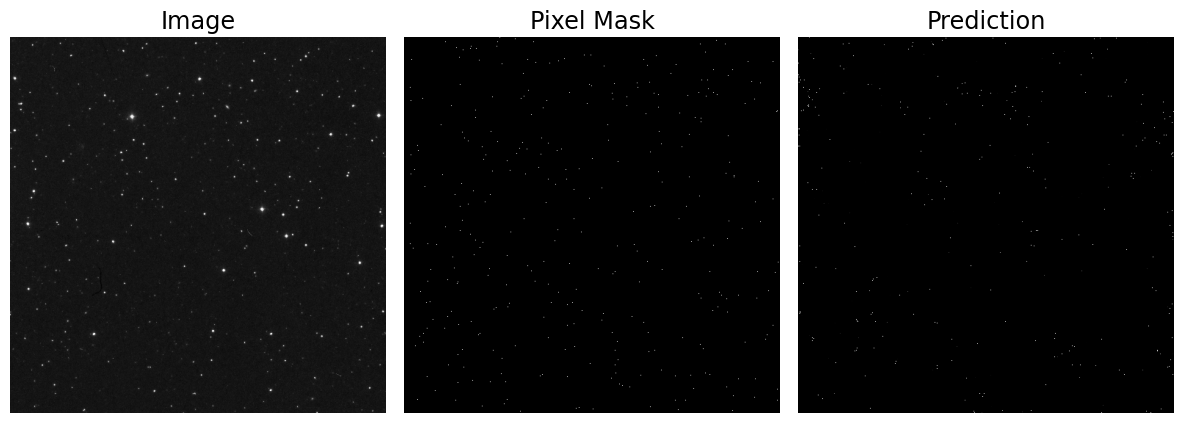

1/1 [==============================] - 0s 17ms/step


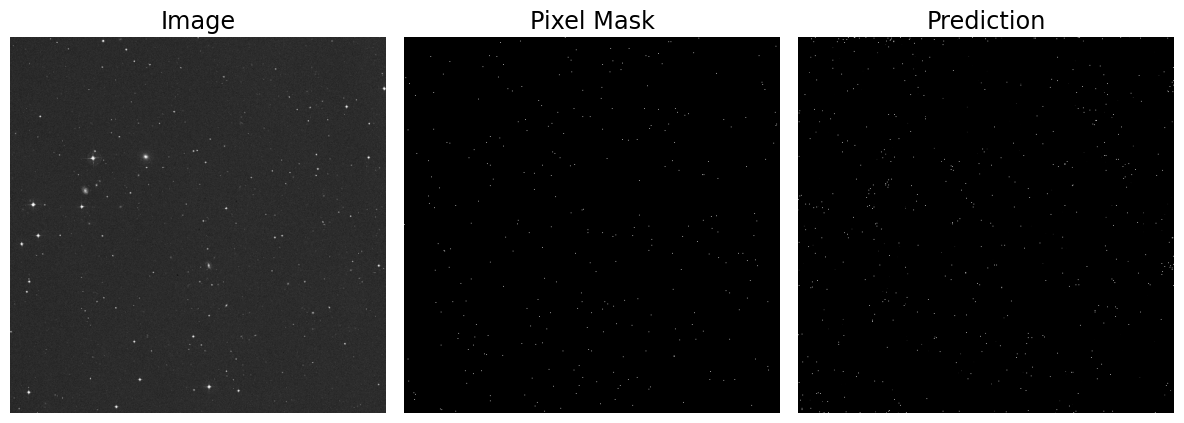

1/1 [==============================] - 0s 17ms/step


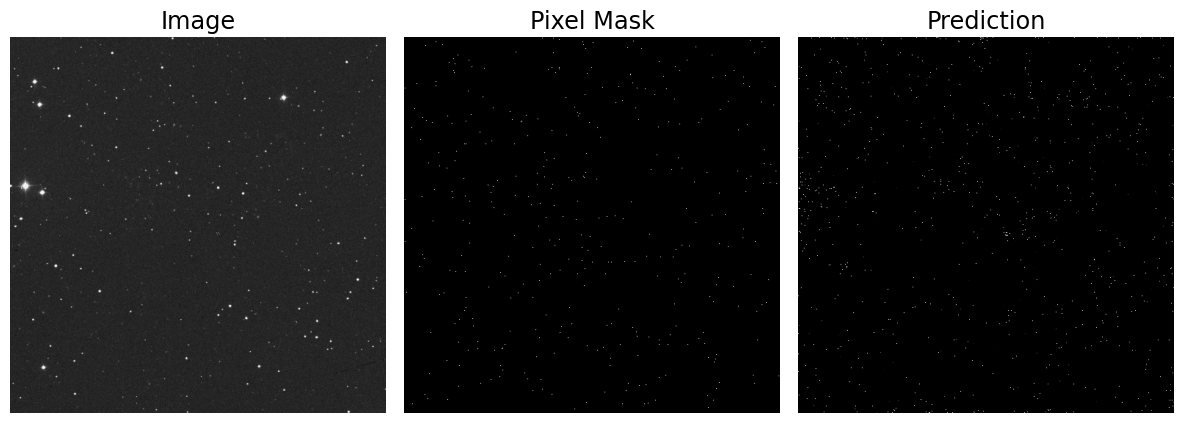

1/1 [==============================] - 0s 17ms/step


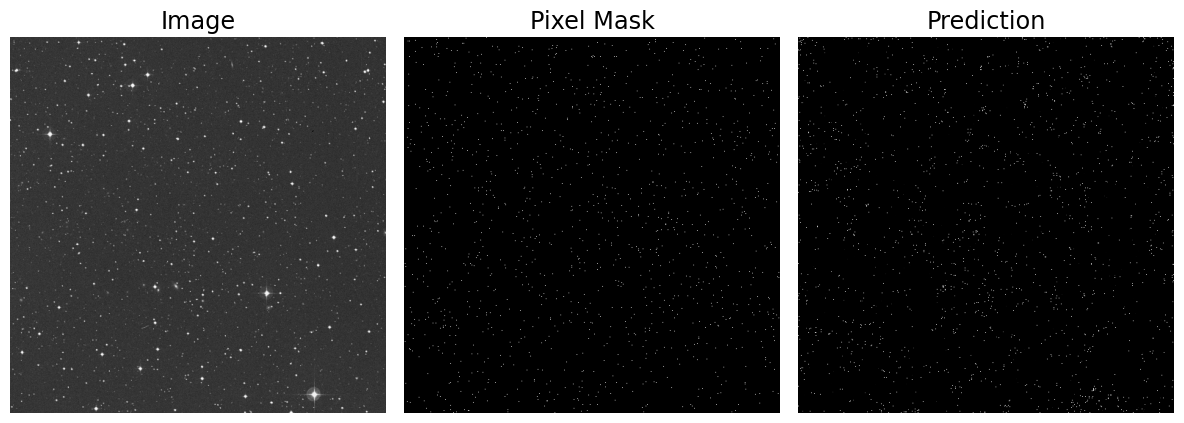

In [16]:
# Plot the results from the model
for i in range(4):
    image = images[i]
    new_image = test_images[i]
    mask = test_masks[i]
    pred_mask = model.predict(np.expand_dims(new_image, axis=0))[0]
    # pred_mask = predictions[i]

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 3, 1)
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.title('Image')

    plt.subplot(1, 3, 2)
    plt.imshow(mask[:, :, 0], cmap='gray')
    plt.axis('off')
    plt.title('Pixel Mask')

    plt.subplot(1, 3, 3)

    plt.imshow(pred_mask, cmap='gray')
    plt.axis('off')
    plt.title('Prediction')

    plt.tight_layout()
    plt.show()

In [17]:
def plot_image_mask_prediction_subplot(selection = 0):
    image = images[i]
    mask = test_masks[selection]
    pred_mask = model.predict(np.expand_dims(test_images[selection], axis=0))[0]
    wcs = wcs_data[selection]

    fig, ax = plt.subplots(1, 3, figsize=(30, 10), subplot_kw={'projection': wcs})
    ax[0].imshow(image, cmap='gray', origin='lower')
    ax[0].set_title('Image')
    ax[0].coords.grid(True, color='white', ls='solid')
    ax[0].coords[0].set_axislabel('RA')
    ax[0].coords[1].set_axislabel('Dec')

    ax[1].imshow(mask[:, :, 0], cmap='gray', origin='lower')
    ax[1].set_title('Pixel Mask')
    ax[1].coords.grid(True, color='white', ls='solid')
    ax[1].coords[0].set_axislabel('RA')
    ax[1].coords[1].set_axislabel('Dec')

    ax[2].imshow(pred_mask, cmap='gray', origin='lower')
    ax[2].set_title('Prediction')
    ax[2].coords.grid(True, color='white', ls='solid')
    ax[2].coords[0].set_axislabel('RA')
    ax[2].coords[1].set_axislabel('Dec')

    plt.show()

1/1 [==============================] - 0s 24ms/step


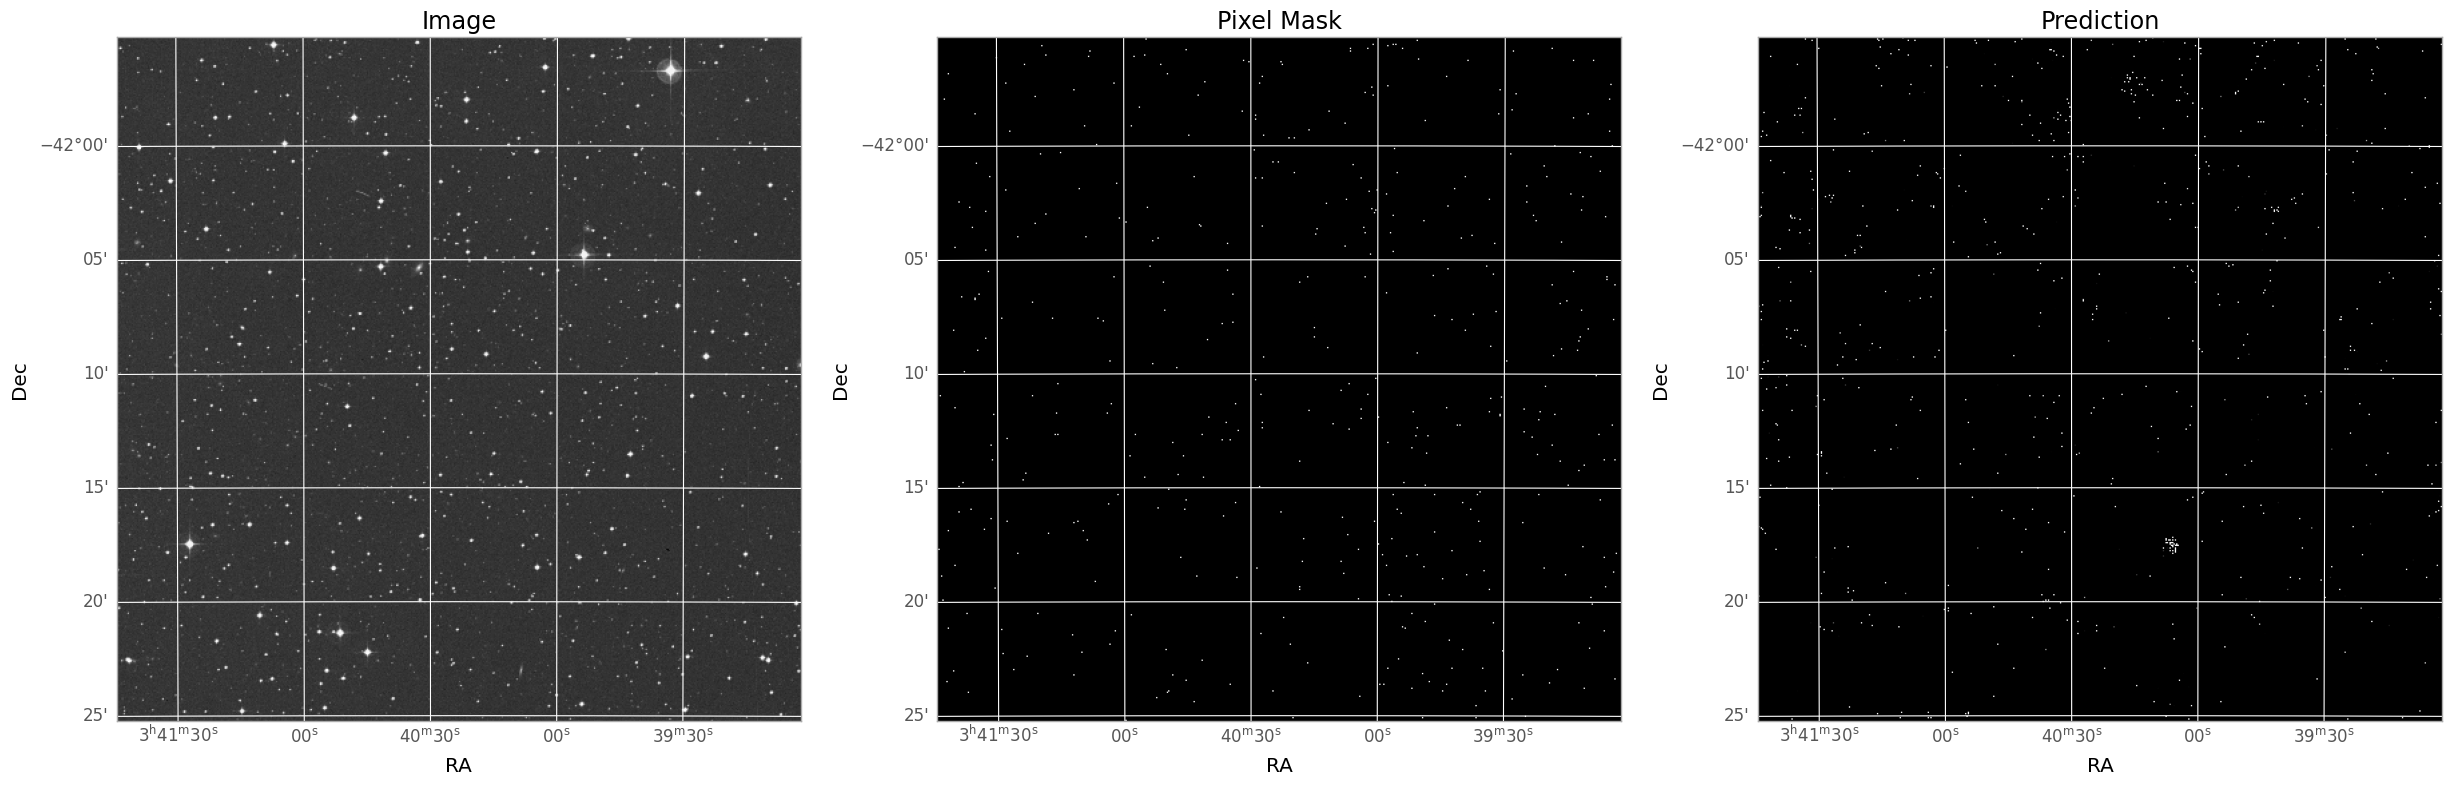

In [18]:
# Plot a random image mask prediction from the test set
selection = np.random.randint(0, len(test_images))
plot_image_mask_prediction_subplot(selection)

In [19]:
def save_image_mask_prediction_subplot(selection = 0):
    image = images[i]
    mask = test_masks[selection]
    pred_mask = model.predict(np.expand_dims(test_images[selection], axis=0))[0]
    wcs = wcs_data[selection]

    fig, ax = plt.subplots(1, 3, figsize=(30, 10), subplot_kw={'projection': wcs})
    ax[0].imshow(image, cmap='gray', origin='lower')
    ax[0].set_title('Image')
    ax[0].coords.grid(True, color='white', ls='solid')
    ax[0].coords[0].set_axislabel('RA')
    ax[0].coords[1].set_axislabel('Dec')

    ax[1].imshow(mask[:, :, 0], cmap='gray', origin='lower')
    ax[1].set_title('Mask')
    ax[1].coords.grid(True, color='white', ls='solid')
    ax[1].coords[0].set_axislabel('RA')
    ax[1].coords[1].set_axislabel('Dec')

    ax[2].imshow(pred_mask[:, :, 0], cmap='gray', origin='lower')
    ax[2].set_title('Prediction')
    ax[2].coords.grid(True, color='white', ls='solid')
    ax[2].coords[0].set_axislabel('RA')
    ax[2].coords[1].set_axislabel('Dec')

    image_title = fits_files[selection] + " Image, Mask, and Prediction"
    plt.suptitle(image_title, fontsize=24)

    file_path = 'results/figures/prediction_subplot/' + fits_files[selection].replace('.fits', '.png')

    print(f'Saving image, mask, and prediction to {file_path}')

    plt.savefig(file_path)

In [20]:

def extract_star_predictions(prediction, threshold=0.5):
    # Normalize the prediction array to be between 0 and 1
    prediction = (prediction - prediction.min()) / (prediction.max() - prediction.min())

    # Ensure the prediction array is 2D
    if prediction.ndim == 3:
        prediction = prediction[:, :, 0]

    # Threshold the prediction array to get the star locations
    stars = np.argwhere(prediction > threshold)

    # Create a list to store the star data
    star_data = []

    # Create a prediction mask of the same shape as the prediction array
    prediction_mask = np.zeros_like(prediction, dtype=np.uint8)

    # Iterate over the star locations and add them to the star data list and prediction mask
    for star in stars:
        y, x = star
        star_data.append((x, y))
        prediction_mask[y, x] = 1

    return star_data, prediction_mask

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from matplotlib.legend_handler import HandlerPatch

def plot_image_mask_prediction_overlay(selection=0, threshold=0.05):
    image = images[selection]
    mask = test_masks[selection]
    stars = stars_in_image[selection]
    pred_star_data, prediction_mask = extract_star_predictions(model.predict(np.expand_dims(test_images[selection], axis=0))[0], threshold=threshold)
    print(np.count_nonzero(prediction_mask))
    wcs = wcs_data[selection]


    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection=wcs)


    # Draw blue circles on the image for pixel mask
    x_dim = wcs.pixel_shape[0]
    y_dim = wcs.pixel_shape[1]

    # Pixel-mask of stars
    pixel_mask = np.zeros((x_dim, y_dim))

    print('Drawing')  # DEBUG

    for star in stars:
        pixel_coords = getPixelCoordsFromStar(star, wcs)
        # Ensure the pixel coordinates are within bounds
        x, y = int(np.round(pixel_coords[0])), int(np.round(pixel_coords[1]))
        if 0 <= x < x_dim and 0 <= y < y_dim:
            pixel_mask[x][y] = 1

        Drawing_colored_circle = plt.Circle((pixel_coords[0], pixel_coords[1]), 3, fill=False, edgecolor='blue', linewidth=0.75)
        ax.add_artist(Drawing_colored_circle)

    # Plot the image
    ax.imshow(image, cmap='gray', origin='lower')

    # Draw red circles on the image for star predictions
    x_dim = wcs.pixel_shape[0]
    y_dim = wcs.pixel_shape[1]

    # Pixel-mask of stars
    pixel_mask = np.zeros((x_dim, y_dim))

    print('Drawing')  # DEBUG

    for star in pred_star_data:
        pixel_coords = star
        # Ensure the pixel coordinates are within bounds
        x, y = int(np.round(pixel_coords[0])), int(np.round(pixel_coords[1]))
        if 0 <= x < x_dim and 0 <= y < y_dim:
            pixel_mask[x][y] = 1

        Drawing_colored_circle = plt.Circle((pixel_coords[0], pixel_coords[1]), 4, fill=False, edgecolor='red', linewidth=0.2)
        ax.add_artist(Drawing_colored_circle)

    ax.set_title(f'{fits_files[selection] + " with Star Location and Star Prediction Overlays"}')
    ax.set_xlabel('RA')
    ax.set_ylabel('Dec')
    ax.grid(color='white', ls='dotted')

    # Add legend
    def make_legend_circle(legend, orig_handle, xdescent, ydescent, width, height, fontsize):
        return Circle((width / 2, height / 2), 0.25 * height, fill=False, edgecolor=orig_handle.get_edgecolor(), linewidth=orig_handle.get_linewidth())


    # Display a legend for the circles
    blue_circle = Circle((0, 0), 1, fill=False, edgecolor='blue', linewidth=1)
    red_circle = Circle((0, 0), 1, fill=False, edgecolor='red', linewidth=1)
    ax.legend([blue_circle, red_circle], ['Star Location', 'Star Prediction'], loc='upper right', handler_map={Circle: HandlerPatch(patch_func=make_legend_circle)})


    plt.show()

1/1 [==============================] - 0s 29ms/step
368
Drawing
Drawing


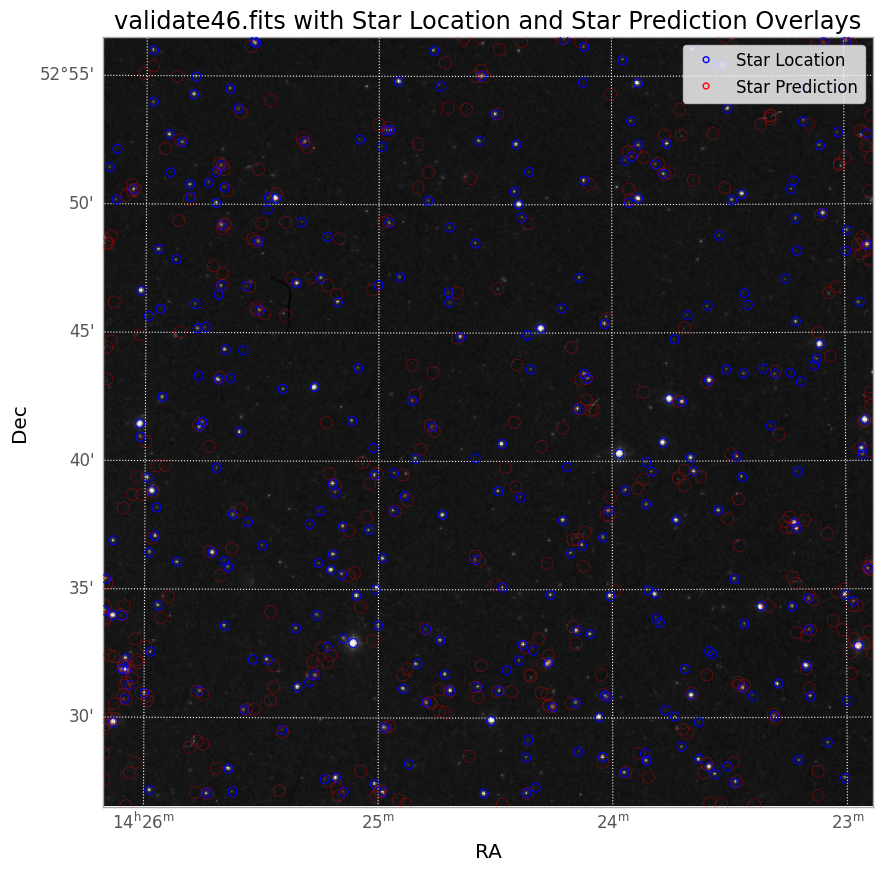

In [26]:
plot_image_mask_prediction_overlay(0, threshold=0.01)

In [23]:
def save_image_mask_prediction_overlay(selection=0, threshold=0.05):
    image = images[selection]
    mask = test_masks[selection]
    stars = stars_in_image[selection]
    pred_star_data, prediction_mask = extract_star_predictions(model.predict(np.expand_dims(test_images[selection], axis=0))[0], threshold=threshold)
    print(np.count_nonzero(prediction_mask))
    wcs = wcs_data[selection]


    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection=wcs)


    # Draw blue circles on the image for pixel mask
    x_dim = wcs.pixel_shape[0]
    y_dim = wcs.pixel_shape[1]

    # Pixel-mask of stars
    pixel_mask = np.zeros((x_dim, y_dim))

    print('Drawing')  # DEBUG

    for star in stars:
        pixel_coords = getPixelCoordsFromStar(star, wcs)
        # Ensure the pixel coordinates are within bounds
        x, y = int(np.round(pixel_coords[0])), int(np.round(pixel_coords[1]))
        if 0 <= x < x_dim and 0 <= y < y_dim:
            pixel_mask[x][y] = 1

        Drawing_colored_circle = plt.Circle((pixel_coords[0], pixel_coords[1]), 3, fill=False, edgecolor='blue', linewidth=0.75)
        ax.add_artist(Drawing_colored_circle)

    # Plot the image
    ax.imshow(image, cmap='gray', origin='lower')

    # Draw red circles on the image for star predictions
    x_dim = wcs.pixel_shape[0]
    y_dim = wcs.pixel_shape[1]

    # Pixel-mask of stars
    pixel_mask = np.zeros((x_dim, y_dim))

    print('Drawing')  # DEBUG

    for star in pred_star_data:
        pixel_coords = star
        # Ensure the pixel coordinates are within bounds
        x, y = int(np.round(pixel_coords[0])), int(np.round(pixel_coords[1]))
        if 0 <= x < x_dim and 0 <= y < y_dim:
            pixel_mask[x][y] = 1

        Drawing_colored_circle = plt.Circle((pixel_coords[0], pixel_coords[1]), 4, fill=False, edgecolor='red', linewidth=0.2)
        ax.add_artist(Drawing_colored_circle)

    image_title = fits_files[selection] + " with Star Location and Star Prediction Overlays" 
    ax.set_title(f'{image_title}')
    ax.set_xlabel('RA')
    ax.set_ylabel('Dec')
    ax.grid(color='white', ls='dotted')

    # Add legend
    def make_legend_circle(legend, orig_handle, xdescent, ydescent, width, height, fontsize):
        return Circle((width / 2, height / 2), 0.25 * height, fill=False, edgecolor=orig_handle.get_edgecolor(), linewidth=orig_handle.get_linewidth())


    # Display a legend for the circles
    blue_circle = Circle((0, 0), 1, fill=False, edgecolor='blue', linewidth=1)
    red_circle = Circle((0, 0), 1, fill=False, edgecolor='red', linewidth=1)
    ax.legend([blue_circle, red_circle], ['Pixel Mask', 'Star Prediction'], loc='upper right', handler_map={Circle: HandlerPatch(patch_func=make_legend_circle)})
    
    file_path = 'results/figures/prediction_overlay/' + fits_files[selection].replace('.fits', '.png')

    print(f'Saving image with mask and prediction overlays to {file_path}')

    plt.savefig(file_path)

In [24]:
# # Iterate over the test set and save the image with overlayed mask and prediction to a file
# for i in range(len(test_images)):
#     save_image_mask_prediction_subplot(selection=i)
#     save_image_mask_prediction_overlay(selection=i)